<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/hands_on_ml1/Dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Compunt Analisis (PCA)



In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


from sklearn.decomposition import PCA

wine_df = pd.read_csv('/content/sample_data/wine (1).csv')
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [22]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Firts we can look the correlation of some features, using Pearson Correlation  

- fixed acidity vs residual sugar 

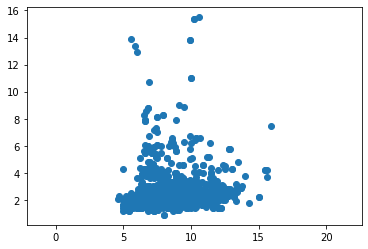

In [11]:
fix_acid = wine_df['fixed acidity']
res_sug = wine_df['residual sugar']

plt.scatter(fix_acid, res_sug)
plt.axis('equal')
plt.show()


### Calculating the pearson Correlation 


In [13]:
correlation, pvalue = pearsonr(fix_acid, res_sug)
print(correlation)

0.11477672449492143


-  low correlation

# Correlation matrix

- let´s see all correlation features 

In [16]:
import seaborn as sns
correlacion = wine_df.corr()
correlacion = correlacion.round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


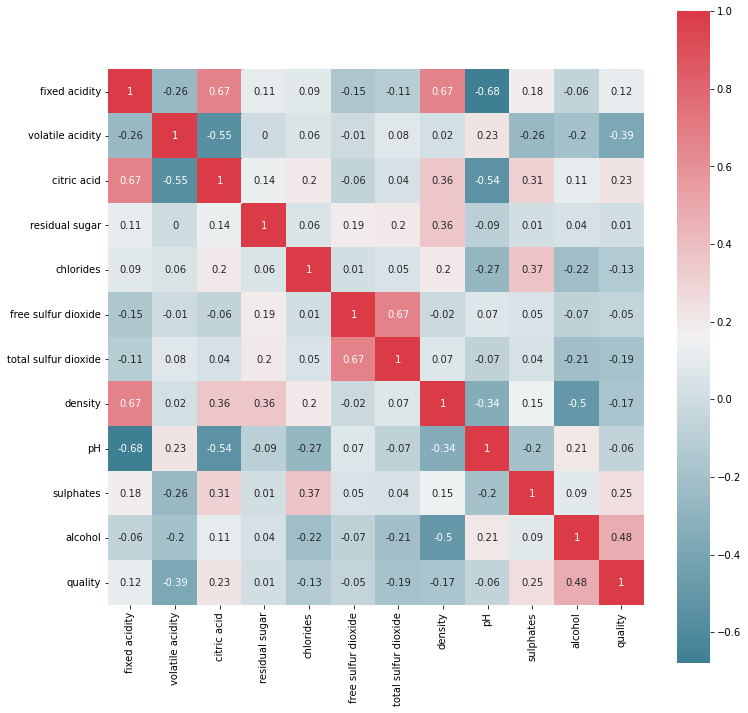

In [18]:
f, ax = plt.subplots(figsize = (12,12))
temp = sns.heatmap(correlacion, mask = np.zeros_like(correlacion, dtype = np.bool), 
                   cmap = sns.diverging_palette(220, 10, as_cmap = True),
                   square = True, ax = ax, annot = True) 

#### Let´s use a PCA 

## Intrisic Dimension 

- Is the number of features required to approximate the dataset 
- The intrisic dimension can be identified by counting the PCA features that have high variance 
- The intrisic dimension is the number of PCA features that have significant variance

 The first principal component of the data is the direction in which the data varies most

 <b> NOTE </b> always we have to converto our dataframe to a numpy array

Text(0, 0.5, 'fixed acidity')

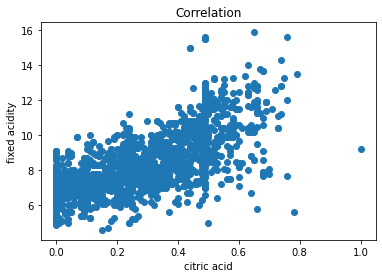

In [36]:
# convert to an array
wine_array =wine_df.to_numpy()

# scatter plot  'citric acid' vs fixed acidity
plt.scatter(wine_df['citric acid'], wine_df['fixed acidity'])
plt.title('Correlation')
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')

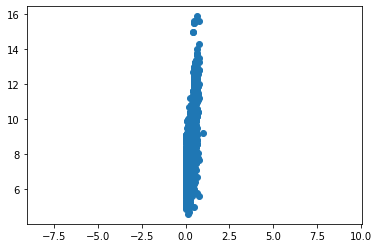

In [47]:
plt.scatter(wine_array[:,2], wine_array[:,0])
# create a pca model 
pca = PCA()
# fit model 
pca.fit(wine_array)
# get the mean of the wine sampleas
mean = pca.mean_

# get the fisrt principal component 
first_pc = pca.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
# Keep axes on same scale
plt.axis('equal')
plt.show()


## Variance of the PCA features 

ValueError: ignored

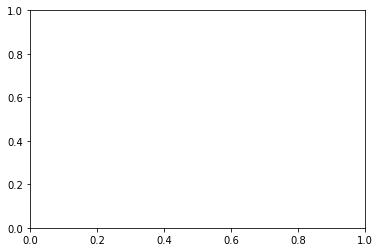

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline =  make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(wine_array)

# Plot the explained variances
features = range(6)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
